# Datasets used :
https://www.kaggle.com/datasets/davidcariboo/player-scores?select=appearances.csv
https://www.kaggle.com/datasets/hugomathien/soccer

In [80]:
import calendar
import itertools
import os
import sqlite3
import warnings
from datetime import date, datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#import kaggle
import re
import zipfile

import pandas as pd

In [81]:
database_path = "datasets/football/european-football/database.sqlite"
conn = sqlite3.connect(database_path)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
print(tables)

    type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Te

In [82]:
dataframes = {}
for idx, name in enumerate(tables['name']):
    if name.lower() != "sqlite_sequence":
        file = ((name.lower() + '_df'))
        if file != "_df":
            query = f"\
                    SELECT * \
                    FROM {name}\
                    "
            df = pd.read_sql(query, conn)
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            df = df.drop_duplicates()
            dataframes[file]= df
print("Data imported")

player_attributes_df (183978, 42)
player_df (11060, 7)
match_df (25979, 115)
league_df (11, 3)
country_df (11, 2)
team_df (299, 5)
team_attributes_df (1458, 25)
Data imported


In [83]:
# Print pd.Dataframe.info() for each dataframe.
for key, df in dataframes.items():
    print(f"{key}:")
    print(f"{df.info()}\n\n")

player_attributes_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64


In [84]:
# Set the directory path.
kaggle_dataset_path = 'davidcariboo/player-scores'
directory_path = 'datasets/football/player-scores'
# Download the datasets
#directory_path = os.path.expanduser('~/src/sorrentum1/research_llm/player-scores')
#os.makedirs(directory_path, exist_ok=True)
#kaggle.api.dataset_download_files(kaggle_dataset_path, path=directory_path, unzip=True)
# Manually unzip the files.
#for dirname, _, filenames in os.walk(local_directory):
#    for filename in filenames:
#        if filename.endswith('.zip'):
#            zip_path = os.path.join(dirname, filename)
#            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#                zip_ref.ref.extractall(local_directory)
# Load the datasets into pandas dataframes.
dataframes_2={}
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        if filename.endswith(".csv"):
            file=filename.split('.')
            file=((file[0]+"_df"))
            if file !="_df":
                filepath=os.path.join(dirname,filename)
                df=pd.read_csv(filepath,sep=",",encoding = "UTF-8")
                exec(f'{file} = df.copy()')
                print(file, df.shape)
                df = df.drop_duplicates()
                dataframes_2[file]= df
print('Data imported')

games_df (67964, 23)
appearances_df (1573079, 13)
competitions_df (43, 11)
clubs_df (426, 17)
players_df (30516, 23)
game_lineups_df (2191911, 10)
game_events_df (734047, 10)
player_valuations_df (467132, 5)
club_games_df (135928, 11)
Data imported


In [85]:
# Print pd.Dataframe.info() for each dataframe.
for key, df in dataframes_2.items():
    print(f"{key}:")
    print(f"{df.info()}\n\n")

games_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67964 entries, 0 to 67963
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 67964 non-null  int64  
 1   competition_id          67964 non-null  object 
 2   season                  67964 non-null  int64  
 3   round                   67964 non-null  object 
 4   date                    67964 non-null  object 
 5   home_club_id            67964 non-null  int64  
 6   away_club_id            67964 non-null  int64  
 7   home_club_goals         67964 non-null  int64  
 8   away_club_goals         67964 non-null  int64  
 9   home_club_position      47914 non-null  float64
 10  away_club_position      47914 non-null  float64
 11  home_club_manager_name  67219 non-null  object 
 12  away_club_manager_name  67219 non-null  object 
 13  stadium                 67750 non-null  object 
 14  attendance              5828

In [86]:
# Function to calculate age.
def calculate_age(born, reference_date):
    return reference_date.year - born.year - ((reference_date.month, reference_date.day) < (born.month, born.day))
# Function to calculate days until contract expiration.
def days_until_expiration(expiration_date, reference_date):
    return (expiration_date - reference_date).dt.days
# Current time for reference in multiple calculations.
current_datetime = datetime.now()
# Process player's birthdates and ages.
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
players_df.dropna(subset=['date_of_birth'], inplace=True)  # More concise for dropping nulls
players_df['age'] = players_df['date_of_birth'].apply(calculate_age, args=(current_datetime,))
# Process contract expiration and days remaining.
players_df['contract_expiration_date'] = pd.to_datetime(players_df['contract_expiration_date'])
players_df.dropna(subset=['contract_expiration_date'], inplace=True)
players_df['term_days_remaining'] = days_until_expiration(players_df['contract_expiration_date'], current_datetime)
# Add position to player valuations.
position_df=players_df[['player_id', 'name', 'position', 'sub_position', 'term_days_remaining']]
player_valuations_df = player_valuations_df.merge(
    position_df,
    on='player_id',
    how='left'
)
# Add position to appearances.
value_df=players_df[['player_id','position','sub_position', 'market_value_in_eur', 'term_days_remaining']]
appearances_df1=value_df.merge(
    appearances_df,
    left_on='player_id',
    right_on='player_id')
# Add year to player valuations.
player_valuations_df['date']=pd.to_datetime(player_valuations_df['date'], format="%Y-%m-%d")
player_valuations_df['year']=player_valuations_df['date'].dt.year
# Add year to player appearances.
appearances_df['datetime']=pd.to_datetime(appearances_df['date'], format="%Y-%m-%d")
appearances_df['year']=appearances_df['datetime'].dt.year

/tmp/ipykernel_517/981762573.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_value_player_valuations_df = _valuations_df[player_valuations_df['market_value_in_eur'] > 40e6]


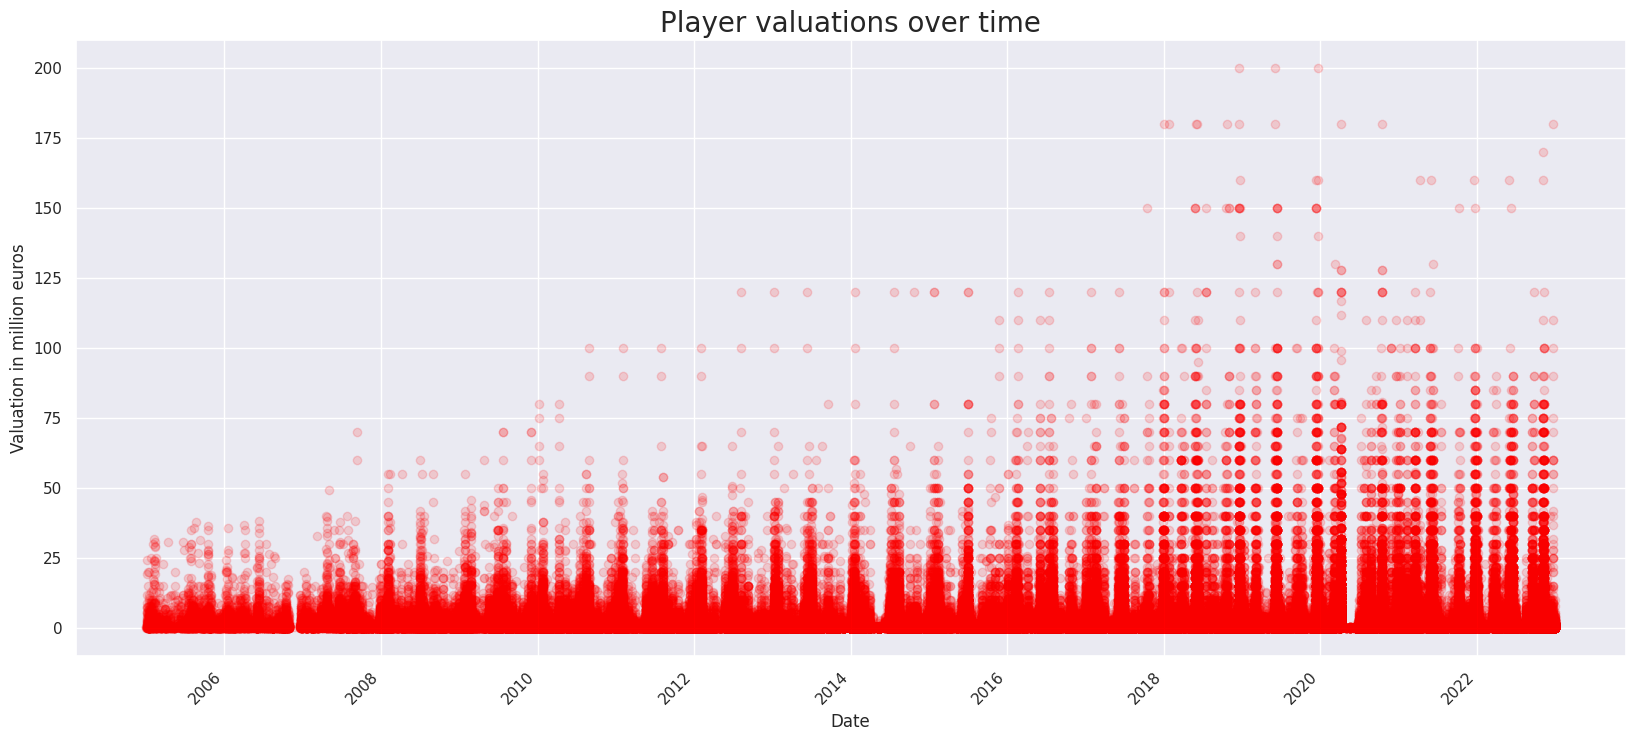

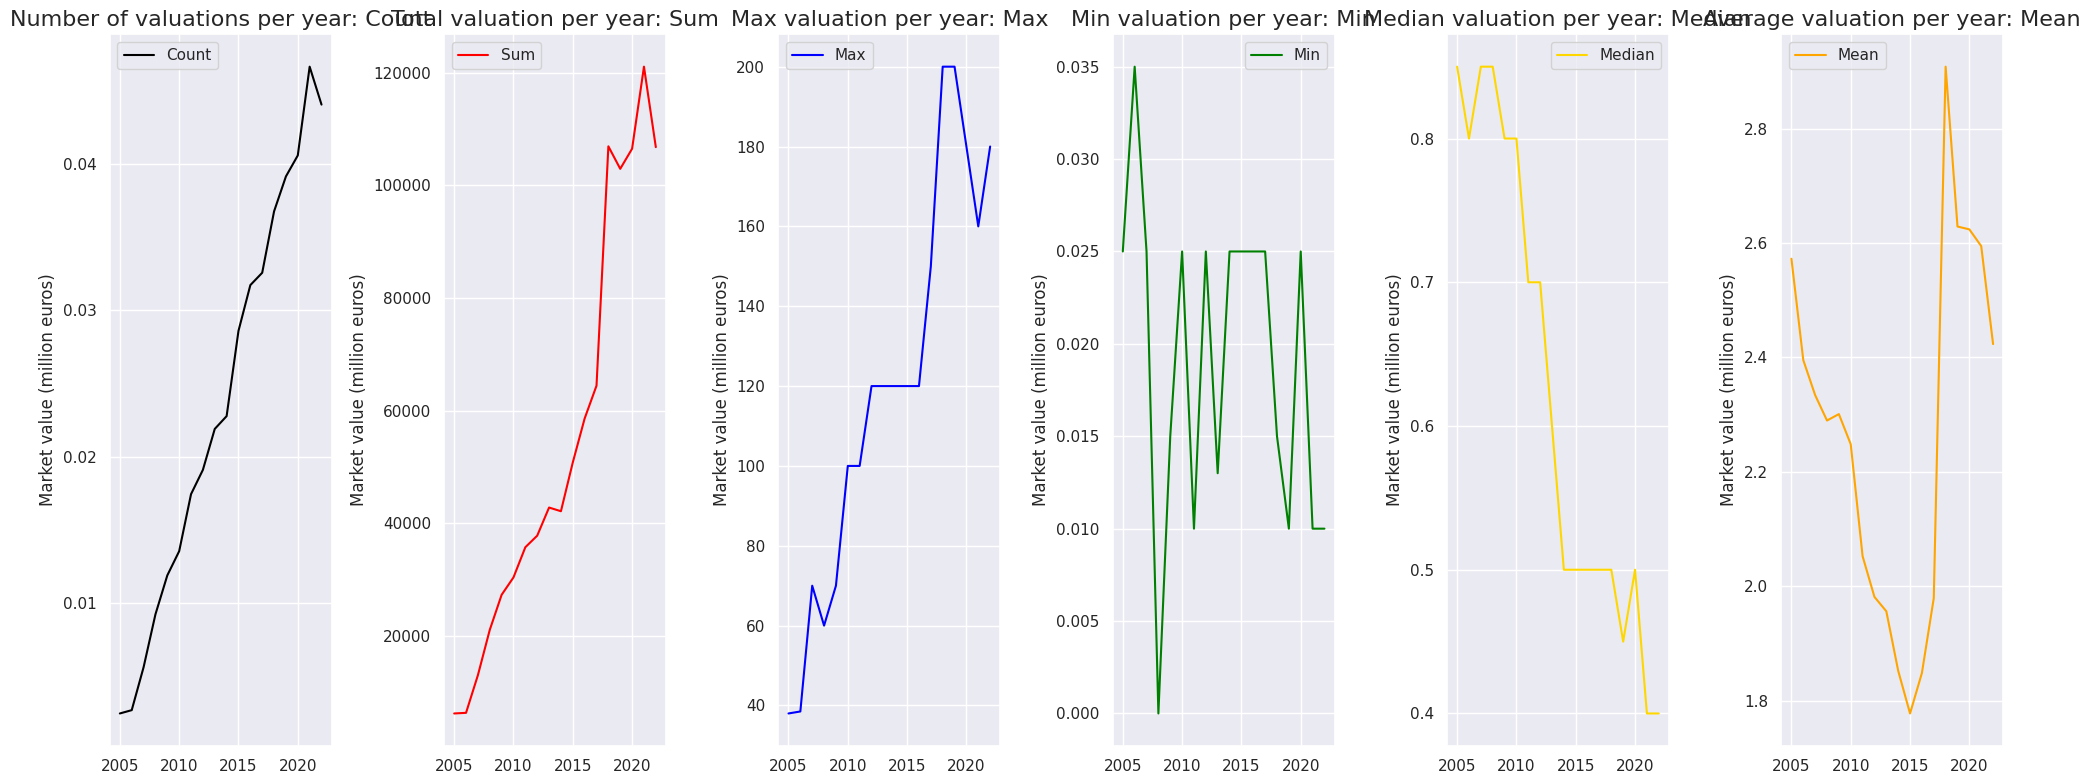

/tmp/ipykernel_517/981762573.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['date'].dt.year.unique(), rotation=90)
/tmp/ipykernel_517/981762573.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['date'].dt.year.unique(), rotation=90)
/tmp/ipykernel_517/981762573.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['date'].dt.year.unique(), rotation=90)
/tmp/ipykernel_517/981762573.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['date'].dt.year.unique(), rotation=90)
/tmp/ipykernel_517/981762573.py:47: UserWarning: set_ticklabels() should onl

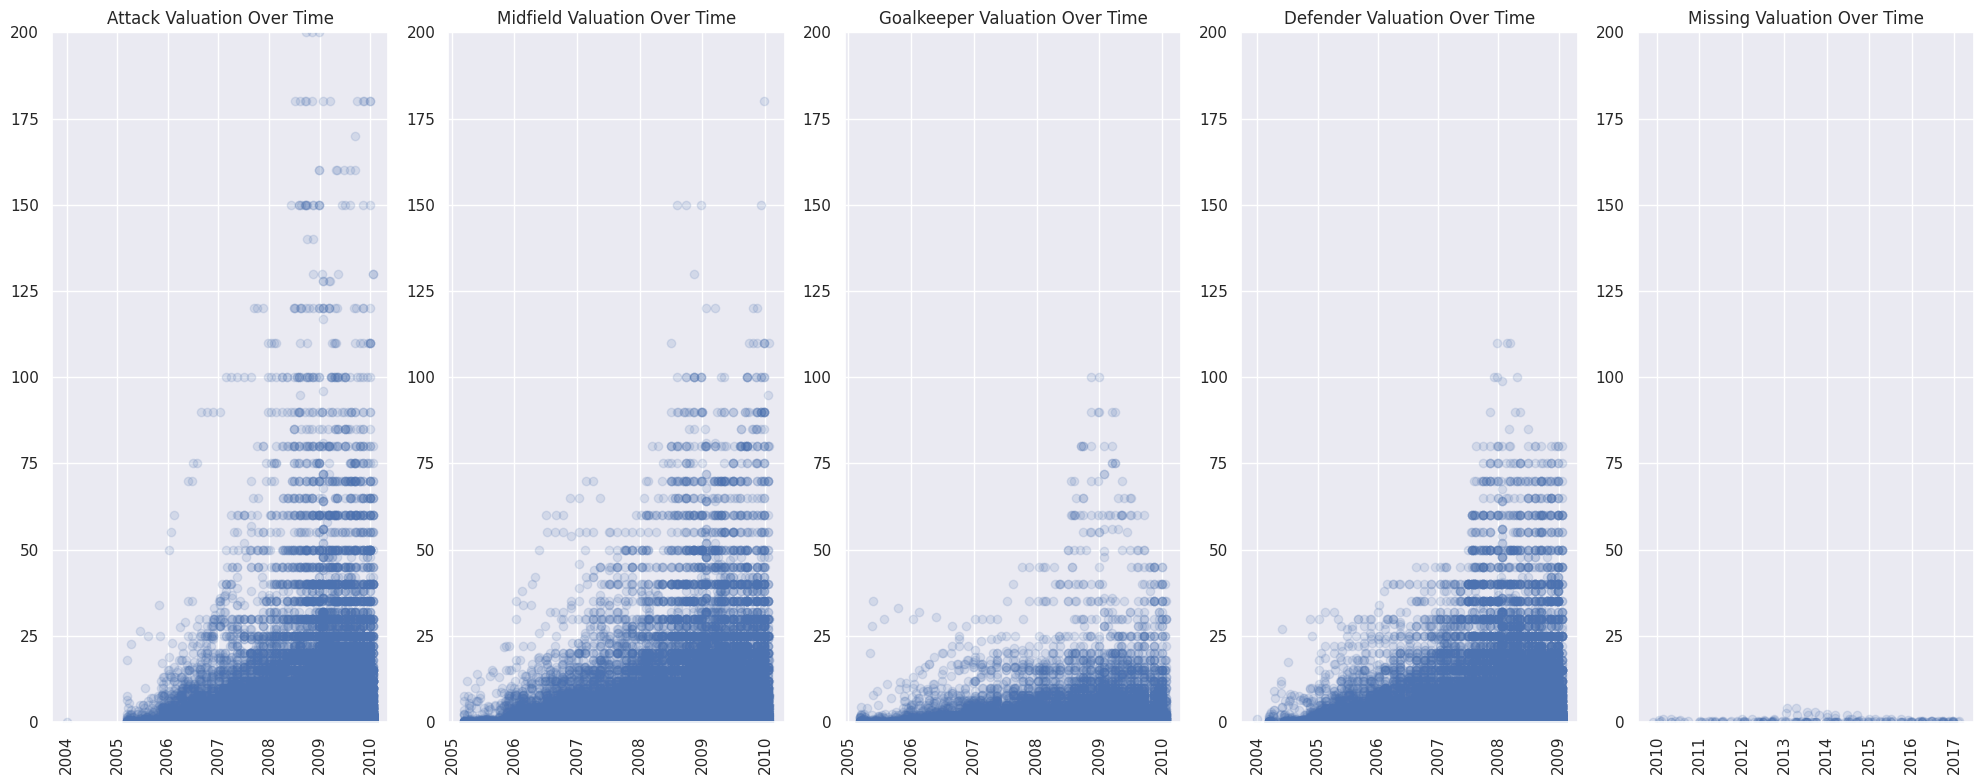

In [87]:
def plot_scatter(df, title, xlabel, ylabel, color, alpha=0.15):
    """
    Generalized scatter plot function.
    """
    plt.scatter(df['date'], df['market_value_in_eur']/1e6, c=color, alpha=alpha)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

def plot_time_series(df_groups, titles, ylabels, styles, colors):
    """
    Function to plot time series data from grouped DataFrames.
    """
    fig, axes = plt.subplots(1, len(df_groups), figsize=(20, 8))
    if len(df_groups) == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot
    for ax, (title, ylabel, df_group, style, color) in zip(axes, zip(titles, ylabels, df_groups, styles, colors)):
        ax.plot(df_group.index, df_group/1e6, style, color=color, label=title.split(':')[1].strip())
        ax.set_title(title, fontsize=16)
        ax.set_ylabel(ylabel)
        ax.legend()
    plt.tight_layout()
    plt.show()

# Load and preprocess data.
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
players_df2 = players_df.dropna(subset=['date_of_birth'])
positions = players_df2['position'].unique()
# Filter and process valuation data.
_valuations_df = player_valuations_df[(player_valuations_df['year'] > 2004) & (player_valuations_df['year'] < 2023)]
high_value_player_valuations_df = _valuations_df[player_valuations_df['market_value_in_eur'] > 40e6]
# Visualization 1: Scatter plot of player valuations over time.
plt.figure(figsize=(20, 8))
plot_scatter(_valuations_df, 'Player valuations over time', 'Date', 'Valuation in million euros', 'red')
# Visualization 2: Different statistical metrics over time.
groups = [_valuations_df.groupby('year')['market_value_in_eur'].agg(func) for func in ('count', 'sum', 'max', 'min', 'median', 'mean')]
titles = ['Number of valuations per year: Count', 'Total valuation per year: Sum', 'Max valuation per year: Max', 'Min valuation per year: Min', 'Median valuation per year: Median', 'Average valuation per year: Mean']
styles = ['-', '-', '-', '-', '-', '-']
colors = ['black', 'red', 'blue', 'green', 'gold', 'orange']
plot_time_series(groups, titles, ['Market value (million euros)'] * len(groups), styles, colors)
# Visualization by position.
fig, axes = plt.subplots(1, len(positions), figsize=(20, 8))
for ax, position in zip(axes, positions):
    subset = player_valuations_df[player_valuations_df['position'] == position]
    if not subset.empty:
        ax.scatter(subset['date'], subset['market_value_in_eur']/1e6, alpha=0.15)
        ax.set_title(f"{position} Valuation Over Time", fontsize=12)
        ax.set_ylim(0, 200)
        ax.set_xticklabels(subset['date'].dt.year.unique(), rotation=90)
        ax.grid(True)
plt.tight_layout()
plt.show()

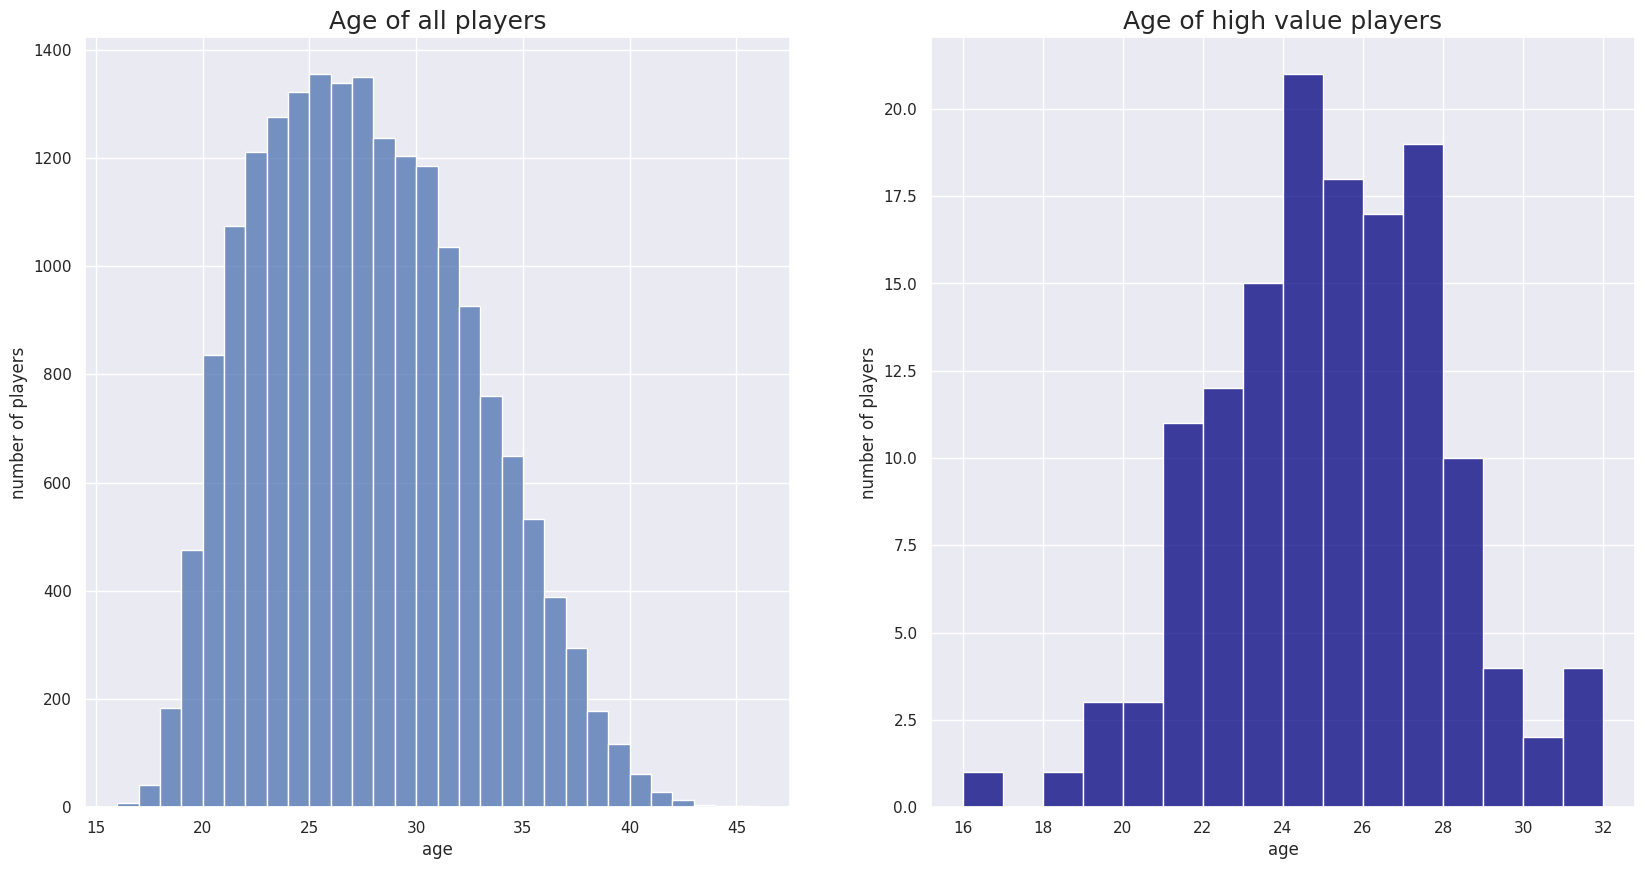

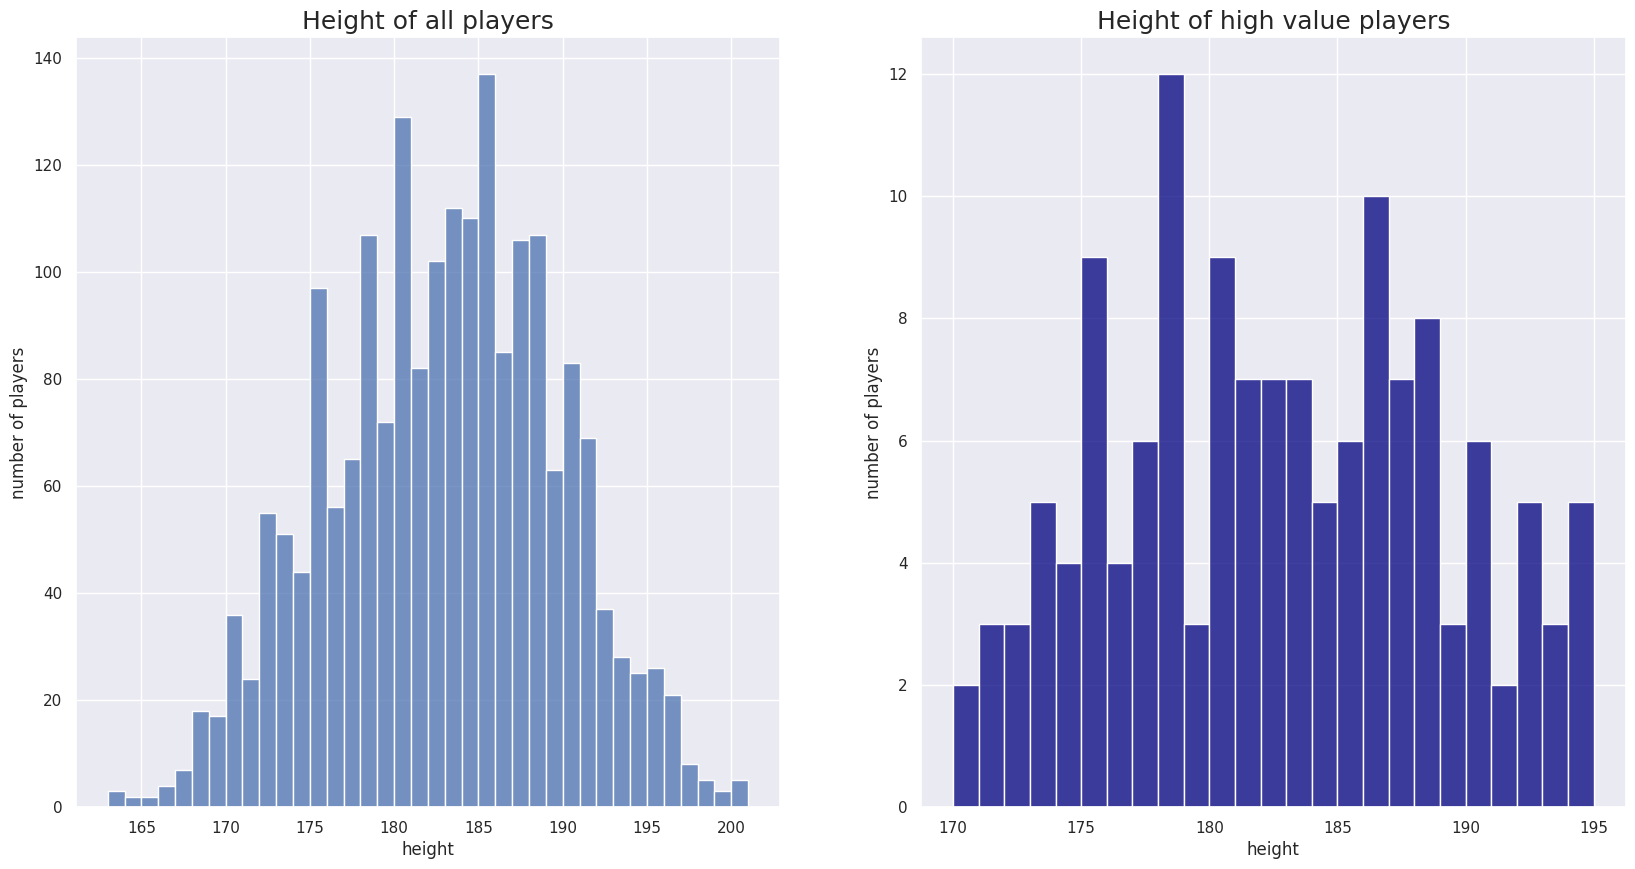

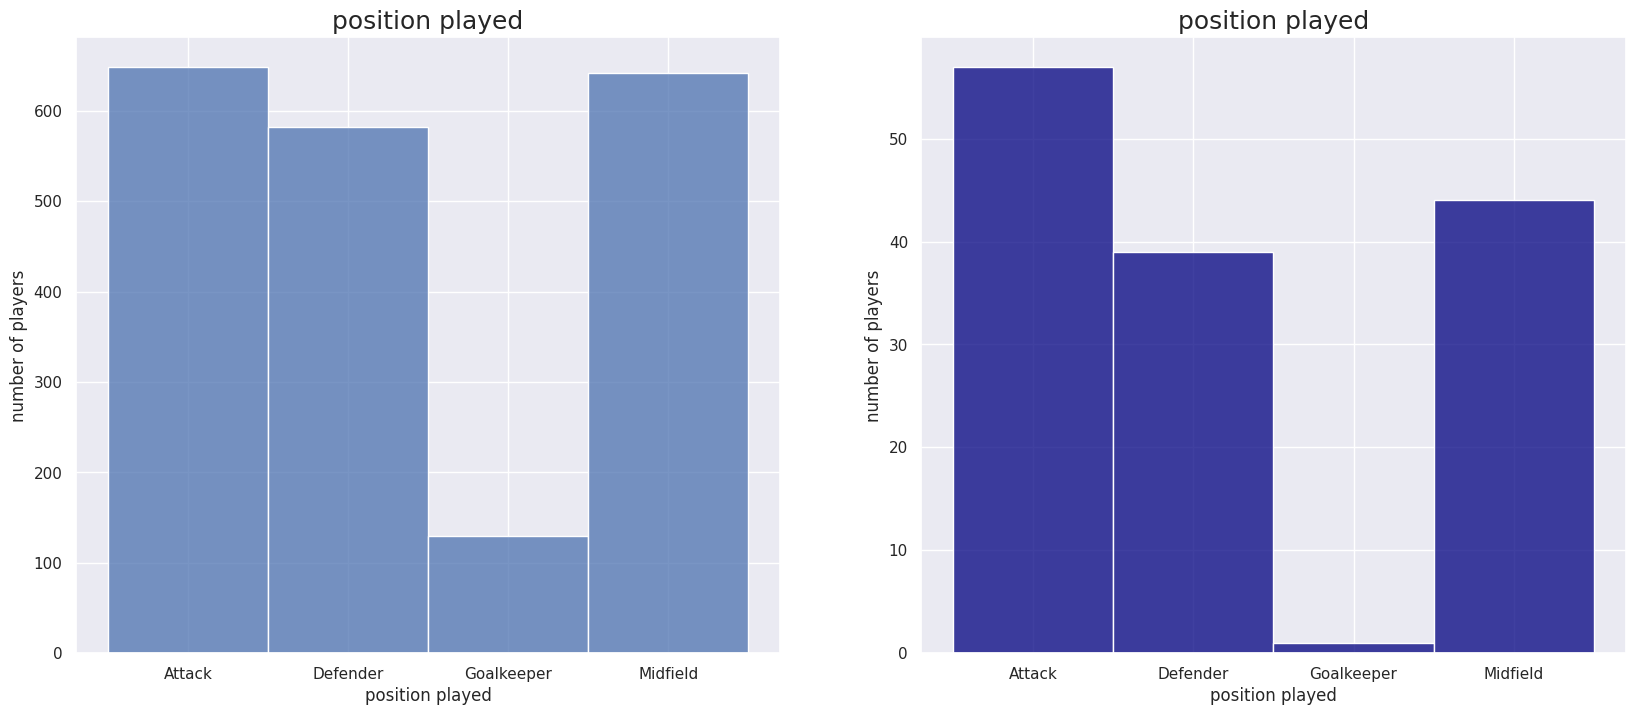

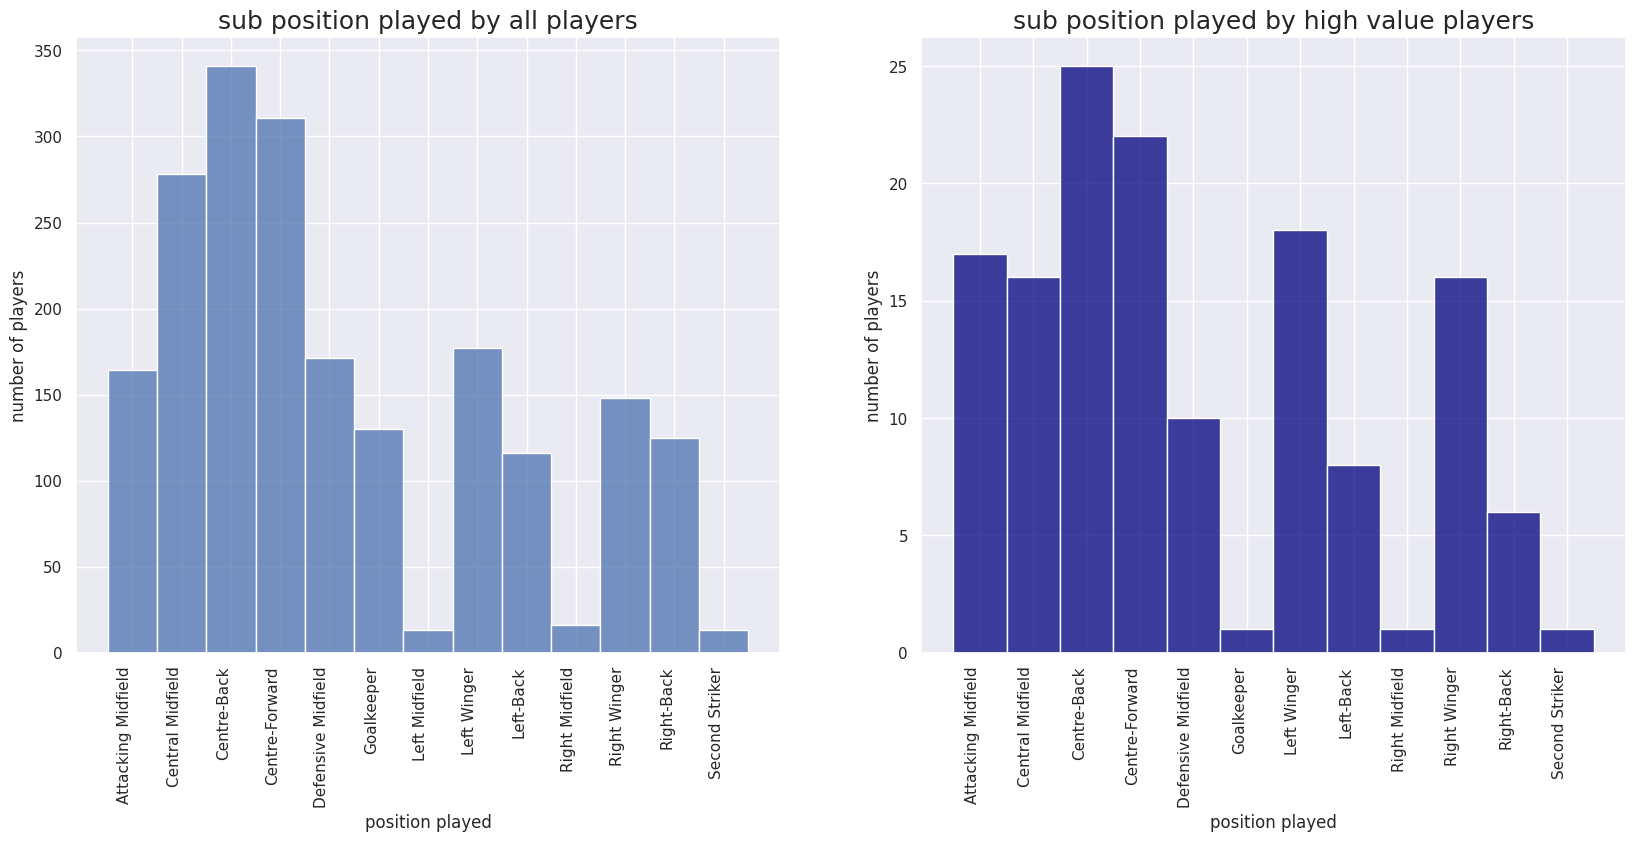

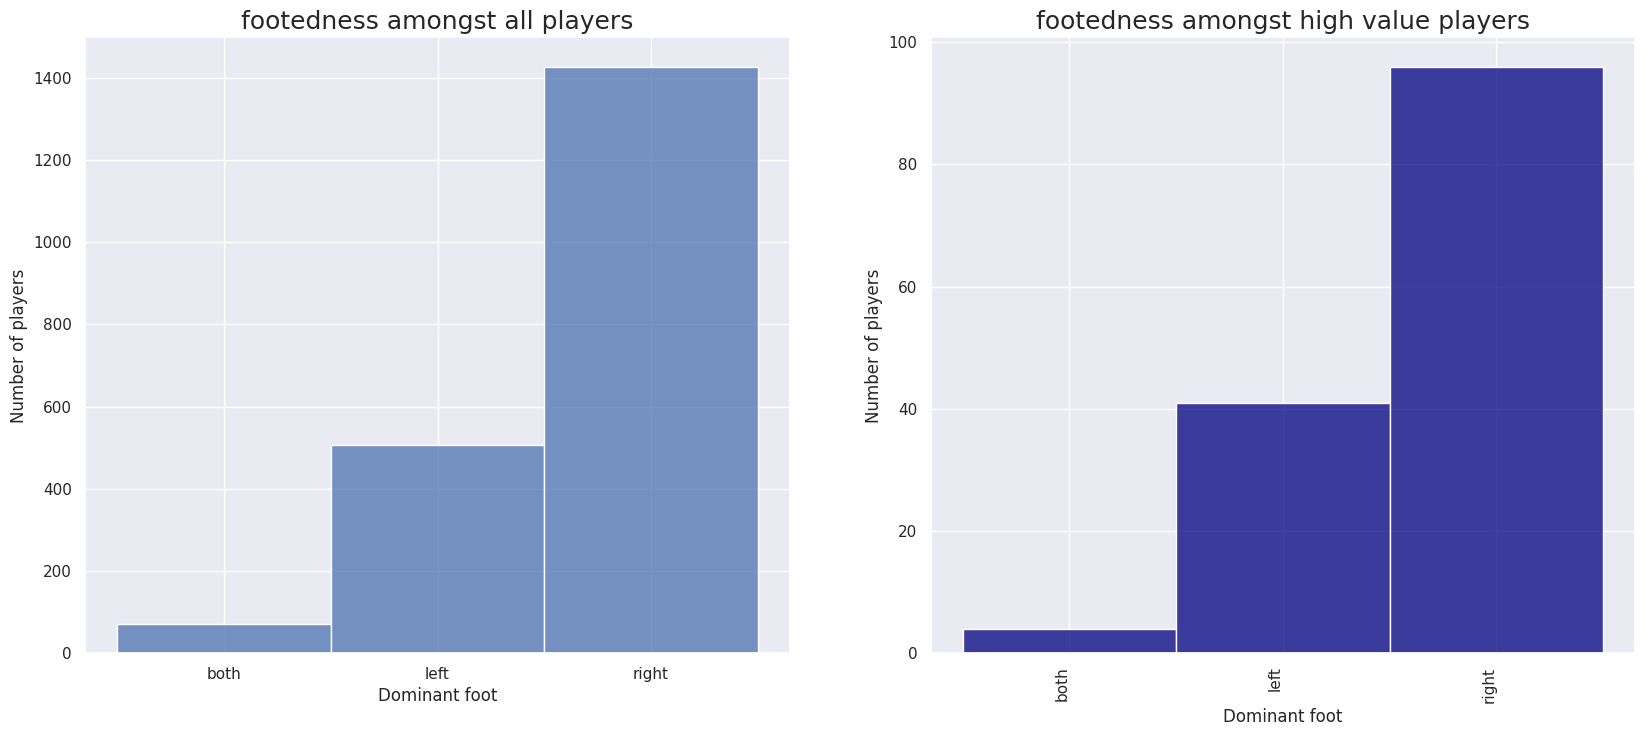

In [88]:
#overview of player dataset.
#remove players with no Market Value.
players_df1 = players_df[players_df.highest_market_value_in_eur.isnull() == False]
#order by Market Value.
players_df1 = players_df1.sort_values("highest_market_value_in_eur", ascending = False)
#filter by season and value.
players_df1 = players_df[players_df['last_season'] >= 2021]
players_df1 = players_df1[players_df1['highest_market_value_in_eur'] >= 10000000]
high_value_players_df = players_df1[(players_df1.market_value_in_eur > 40000000 )]
positions=players_df.position.unique()
# Show player age distribution.
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='age',data=players_df, binwidth=1,color='b')
plt.title("Age of all players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='age',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Age of high value players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')
# Show player height distribution.
players_df3 = players_df1[players_df1.height_in_cm.isnull() == False]
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='height_in_cm',data=players_df3, binwidth=1,color='b')
plt.title("Height of all players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='height_in_cm',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Height of high value players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')
# Show position data.
players_df1 = players_df1.sort_values("position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
plt.title("position played",fontsize=18);plt.grid(True)
sns.histplot(x='position',data=players_df1, binwidth=1,color='b')
plt.xlabel('position played'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("position played",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
# Show subposition data.
players_df1 = players_df1.sort_values("sub_position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("sub_position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='sub_position',data=players_df1, binwidth=1,color='b')
plt.title("sub position played by all players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
plt.subplot(1, 2, 2)
sns.histplot(x='sub_position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("sub position played by high value players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
# Show  footedness data.
players_df1 = players_df1.sort_values("foot", ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values("foot", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='foot',data=players_df1, binwidth=1,color='b')
plt.title("footedness amongst all players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='foot',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("footedness amongst high value players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.xticks(rotation=90, ha='right');

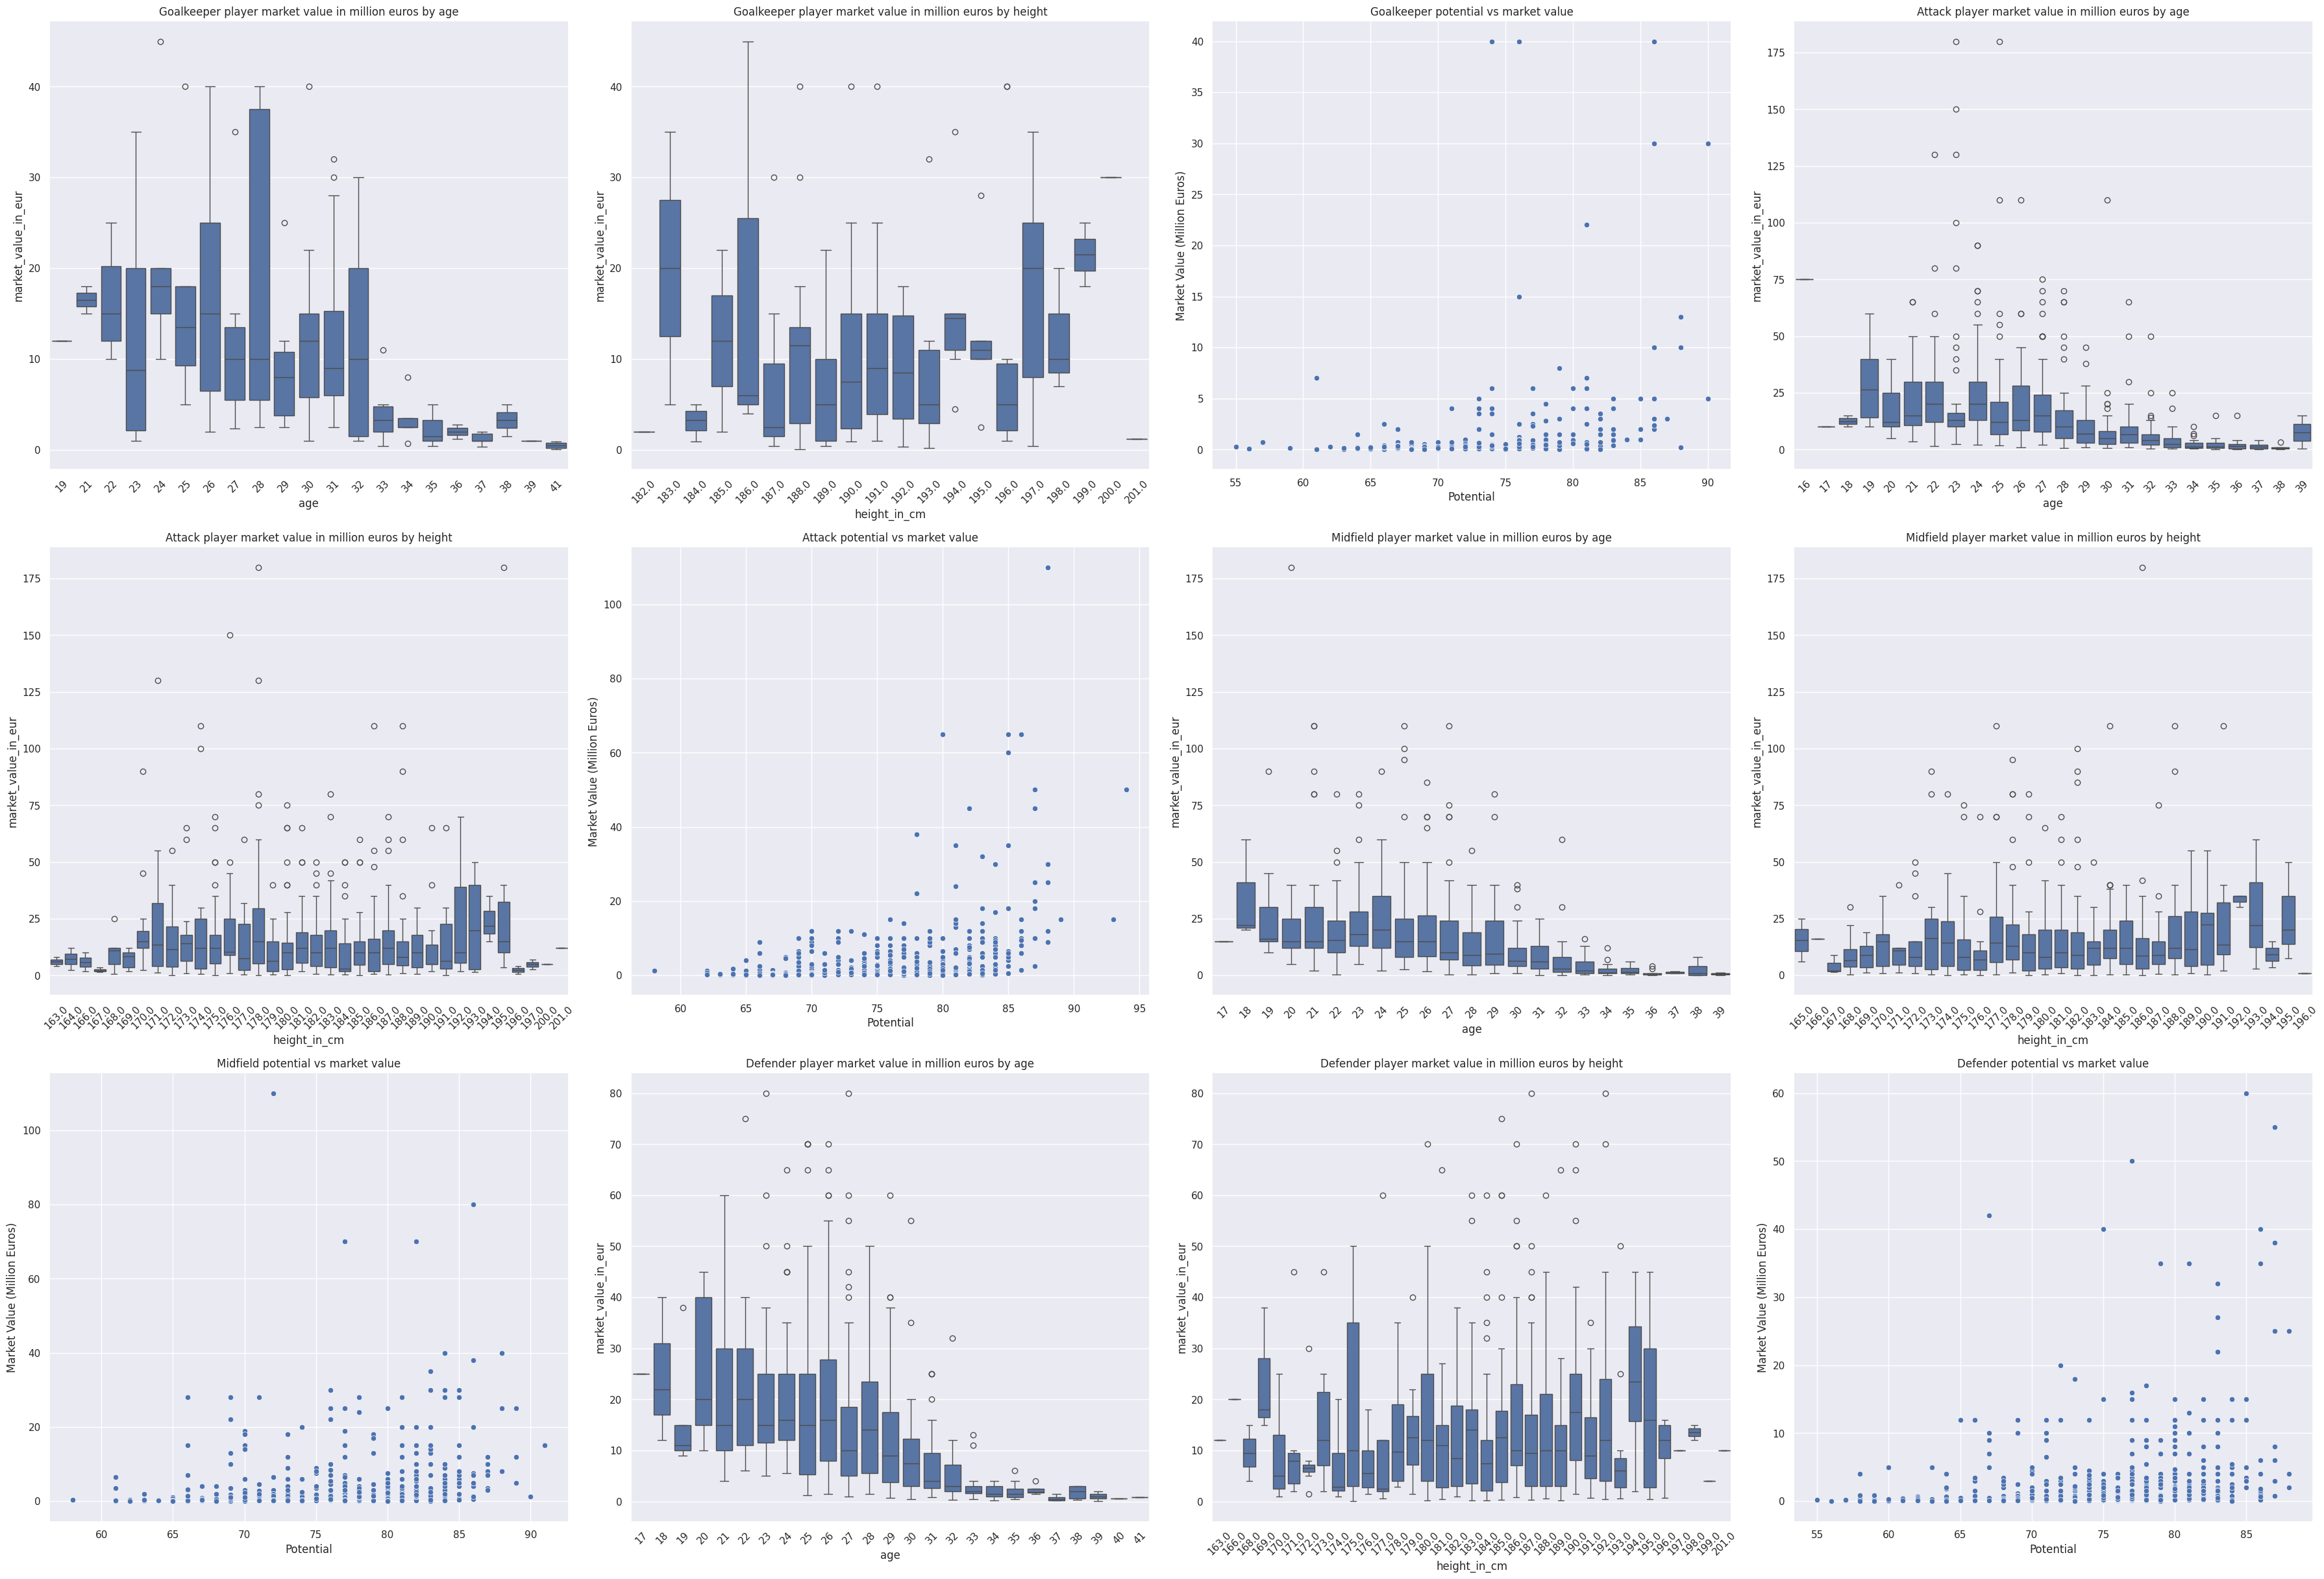

In [89]:
# Convert date column to datetime.
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])
player_valuations_df['date'] = pd.to_datetime(player_valuations_df['date'])
# Extract latest valuations and attributes.
player_attributes_df = player_attributes_df.sort_values(by=['player_api_id', 'date'])
latest_attributes_df = player_attributes_df.drop_duplicates(subset=['player_api_id'], keep='last')
player_valuations_df = player_valuations_df.sort_values(by=['player_id', 'date'])
latest_valuations_df = player_valuations_df.drop_duplicates(subset=['player_id'], keep='last')
# Extract name for attributes.
latest_attributes_df = latest_attributes_df.merge(player_df[['player_fifa_api_id', 'player_api_id', 'player_name']],
                                                  on=['player_fifa_api_id', 'player_api_id'],
                                                  how='left')
# Merge latest attributes and valuations.
latest_valuations_df = latest_valuations_df.rename(columns={'name': 'player_name'})
latest_attributes_df = latest_attributes_df.merge(latest_valuations_df,
                                                  on='player_name',
                                                  how='left')
# Extract the positions lists.
positions = players_df1['position'].unique()
# Set up the figure.
f = plt.figure(figsize=(36, 48))
# Indices for subplots.
n = 1
# Plot for each position.
for position in positions:
    # Market value by age for all players.
    plt.subplot(6, 4, n)
    players_df2 = players_df1[players_df1['position'] == position]
    latest_attributes_df1 = latest_attributes_df[latest_attributes_df['position']==position]
    sns.boxplot(x=players_df2["age"], y=(players_df2['market_value_in_eur']) / 1000000)
    plt.title(f'{position} player market value in million euros by age')
    plt.xticks(rotation=45)
    n += 1
    # Market value by height for all players.
    plt.subplot(6, 4, n)
    sns.boxplot(x=players_df2["height_in_cm"], y=(players_df2['market_value_in_eur']) / 1000000)
    plt.title(f'{position} player market value in million euros by height')
    plt.xticks(rotation=45)
    n += 1
    # Additional plot comparing 'potential' and 'market_value_in_eur'.
    plt.subplot(6, 4, n)
    sns.scatterplot(x=latest_attributes_df1['potential'], y=(latest_attributes_df1['market_value_in_eur']) / 1000000)
    plt.title(f'{position} potential vs market value')
    plt.ylabel('Market Value (Million Euros)')
    plt.xlabel('Potential')
    n += 1
# Adjust layout.
plt.tight_layout()
plt.show()

In [90]:
# Merge to get home_team_name.
match_df = match_df.merge(team_df[['team_api_id', 'team_long_name']], how='left',
                          left_on='home_team_api_id', right_on='team_api_id')
match_df = match_df.rename(columns={'team_long_name': 'home_team_name'})
match_df = match_df.drop(columns=['team_api_id'])
# Merge to get away_team_name.
match_df = match_df.merge(team_df[['team_api_id', 'team_long_name']], how='left',
                          left_on='away_team_api_id', right_on='team_api_id')
match_df = match_df.rename(columns={'team_long_name': 'away_team_name'})
match_df = match_df.drop(columns=['team_api_id'])
# Extract league names.
league_df = league_df.rename(columns={'id': 'league_id', 'name':'league_name'})
match_df = match_df.merge(league_df[['league_id', 'league_name']],
                         on= 'league_id',
                         how = 'left')
# Merge betting lines information on games df.
competitions_df = competitions_df.rename(columns={'name': 'league_name'})
games_df = games_df.merge(competitions_df[['competition_id', 'league_name']],
                         on = 'competition_id',
                         how = 'left')
games_df = games_df.rename(columns={'away_club_name': 'away_team_name', 'home_club_name':'home_team_name'})

# Function to clean and format strings.
def clean_string(s):
    if pd.isnull(s):
        return ''
    return re.sub(r'\W+', '', str(s)).lower()

# Clean and format the columns in games_df.
games_df['home_team_name'] = games_df['home_team_name'].apply(clean_string)
games_df['away_team_name'] = games_df['away_team_name'].apply(clean_string)
games_df['league_name'] = games_df['league_name'].apply(clean_string)
games_df['date'] = pd.to_datetime(games_df['date'])
# Clean and format the columns in match_df.
match_df['home_team_name'] = match_df['home_team_name'].apply(clean_string)
match_df['away_team_name'] = match_df['away_team_name'].apply(clean_string)
match_df['league_name'] = match_df['league_name'].apply(clean_string)
match_df['date'] = pd.to_datetime(match_df['date'])
# Select custom columns from match_df.
custom_columns = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD',
       'GBA', 'BSH', 'BSD', 'BSA']
# Merge games_df with match_df on the cleaned columns.
merged_df = pd.merge(games_df, match_df[['home_team_name', 'away_team_name', 'date'] + custom_columns],
                     on=['home_team_name', 'away_team_name', 'date'], how='left')

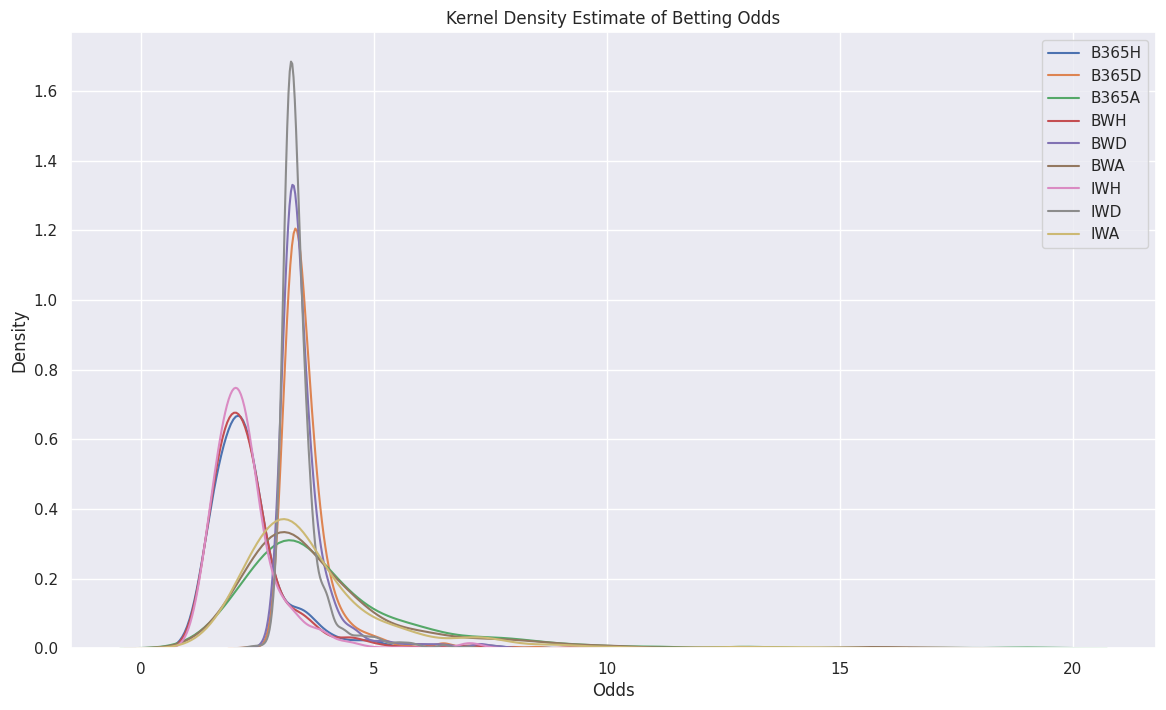

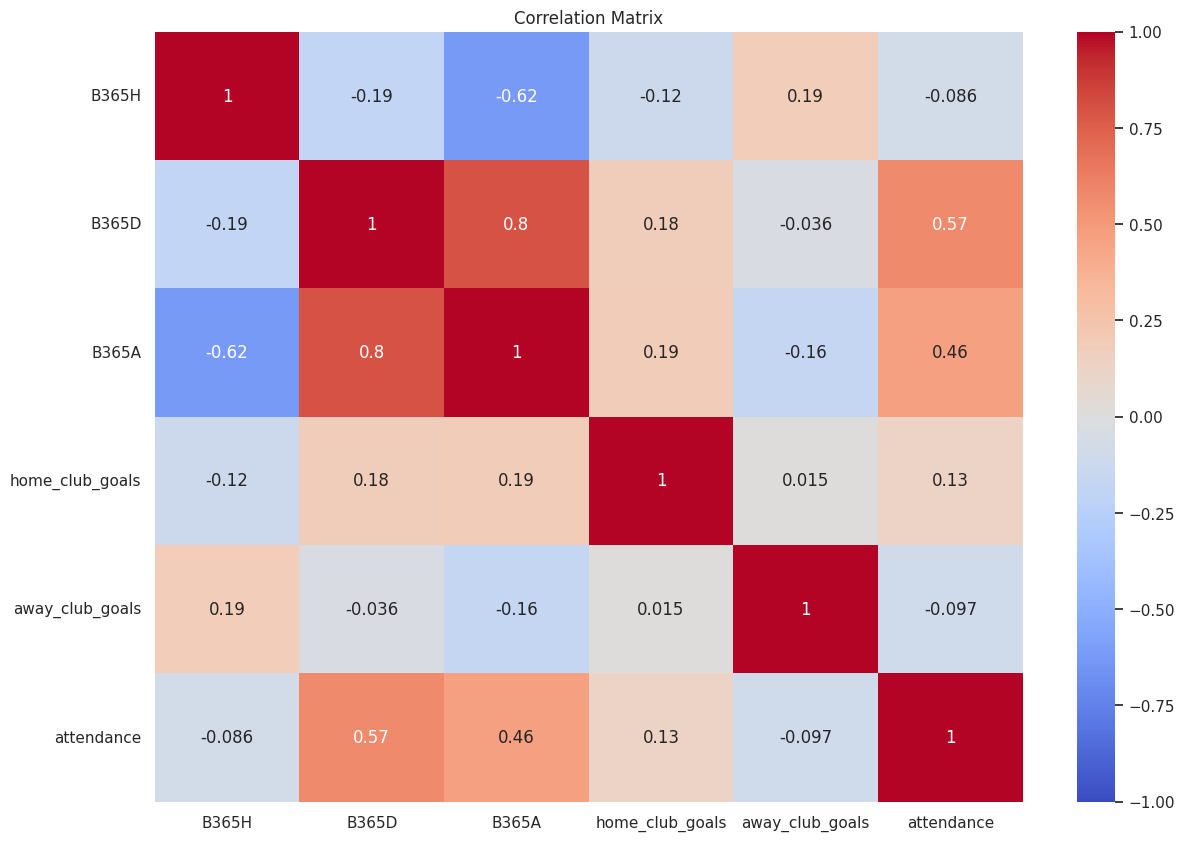

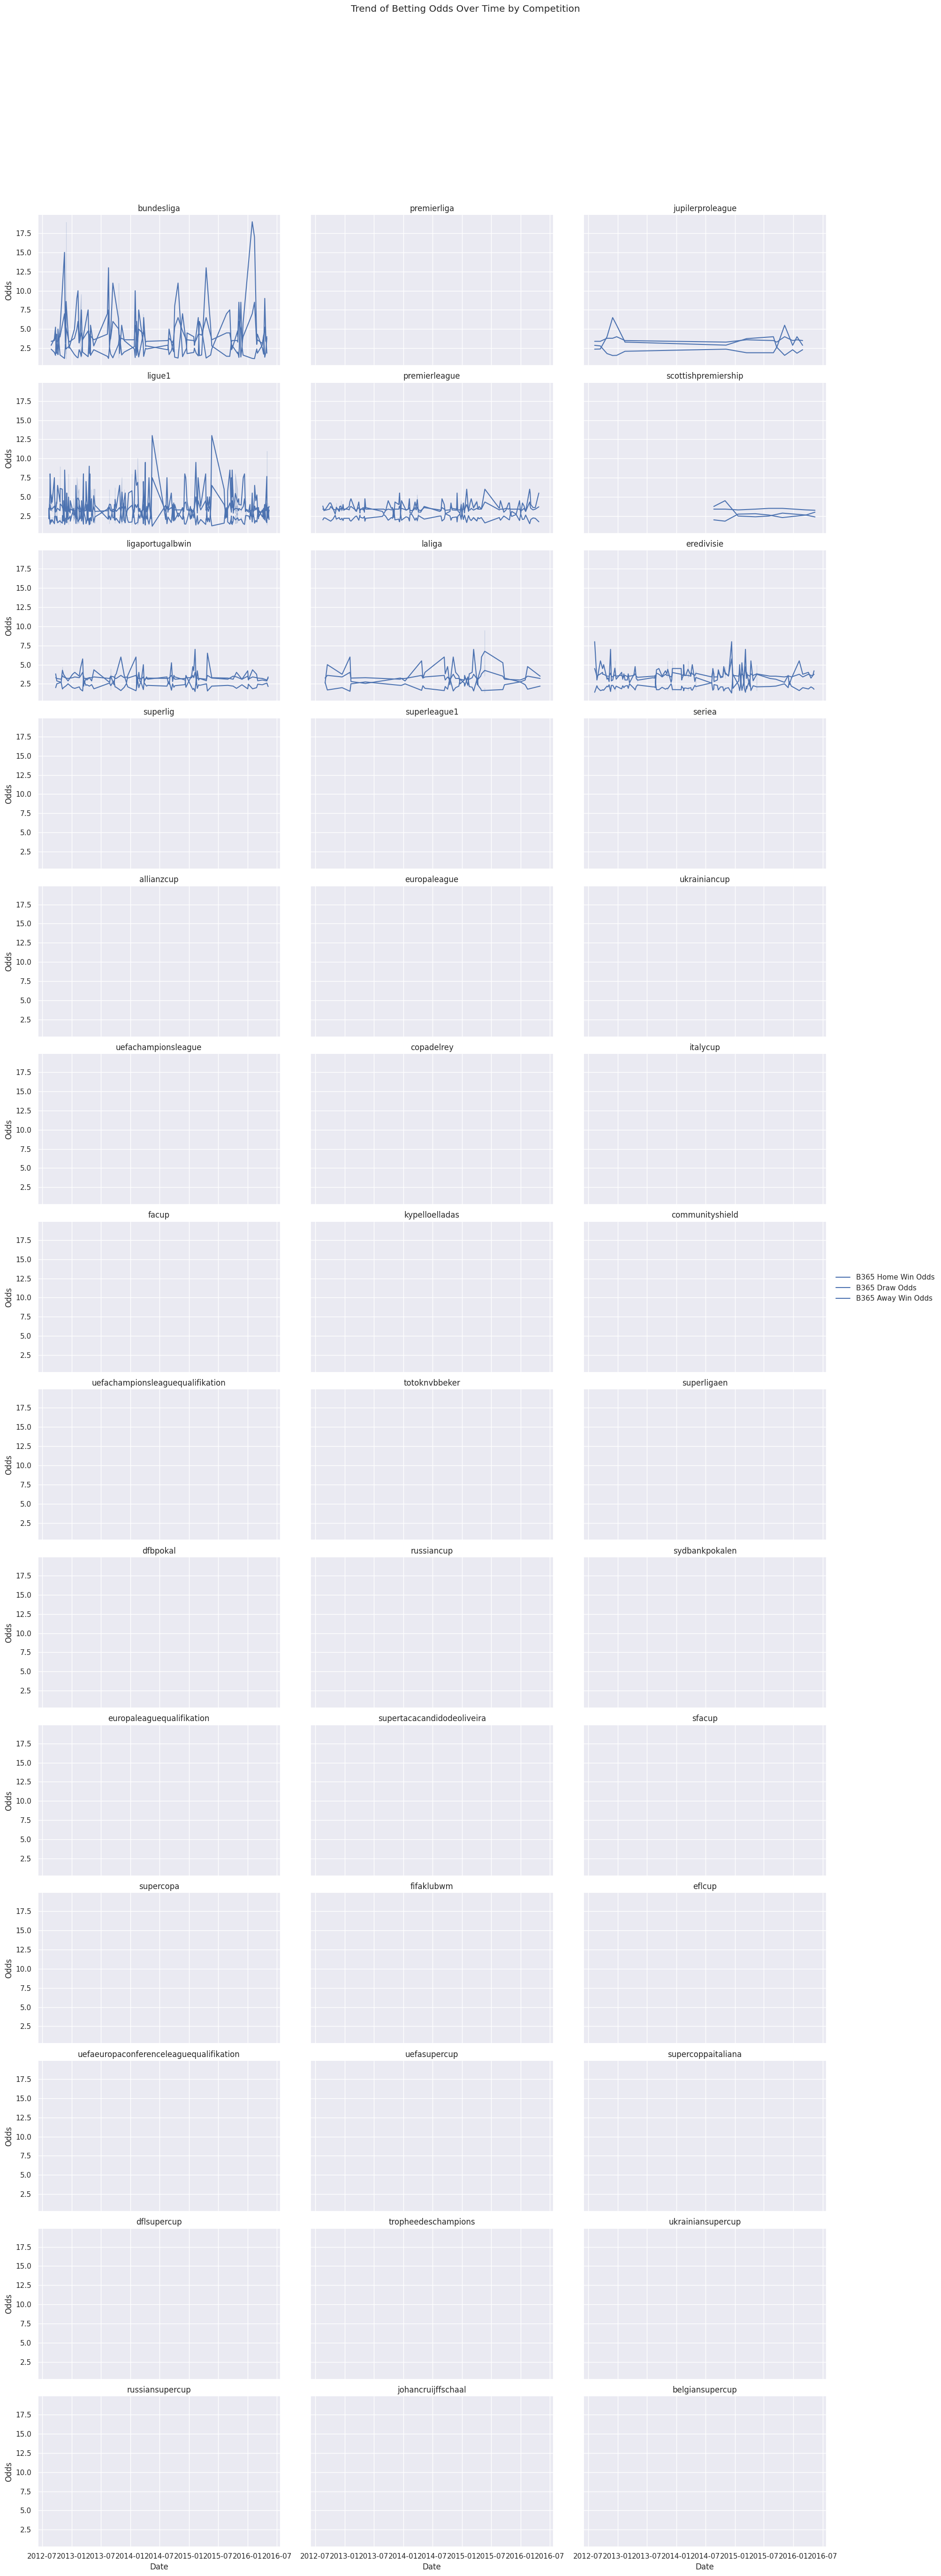

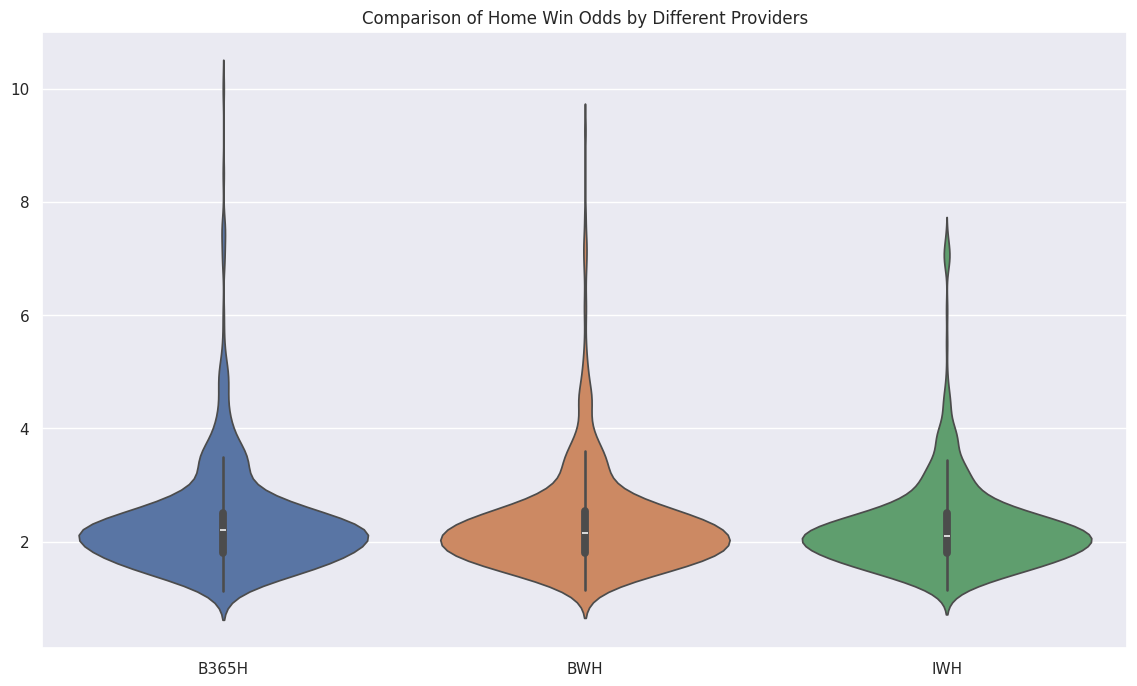

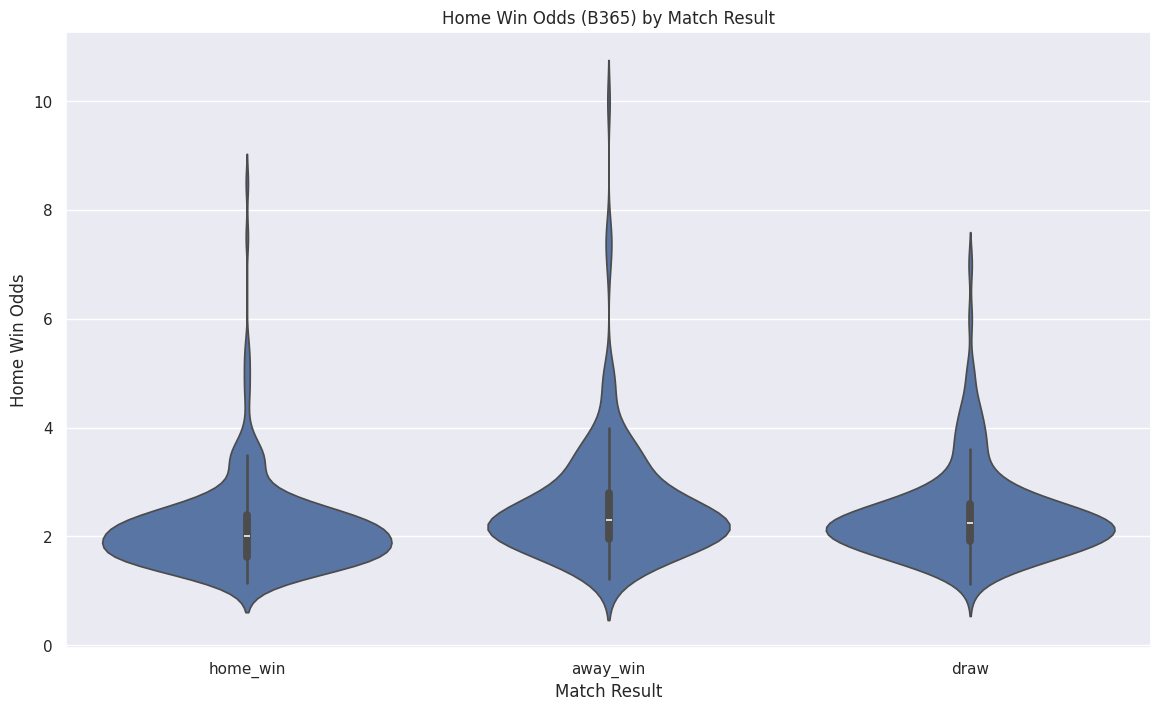

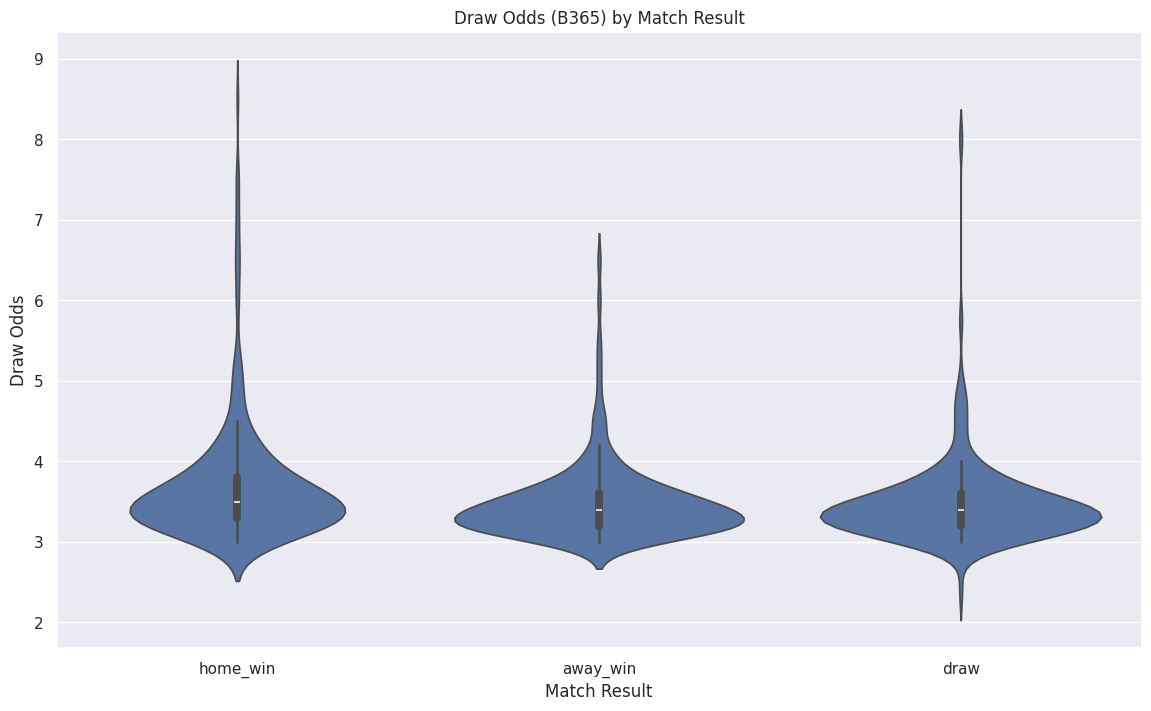

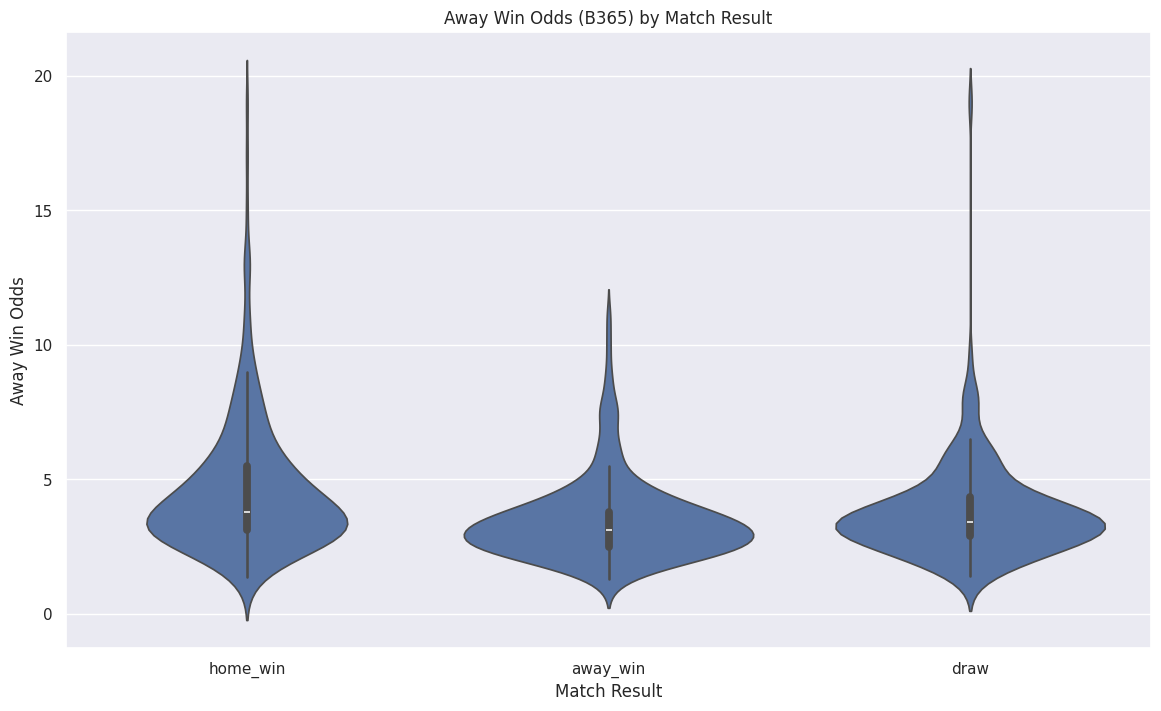

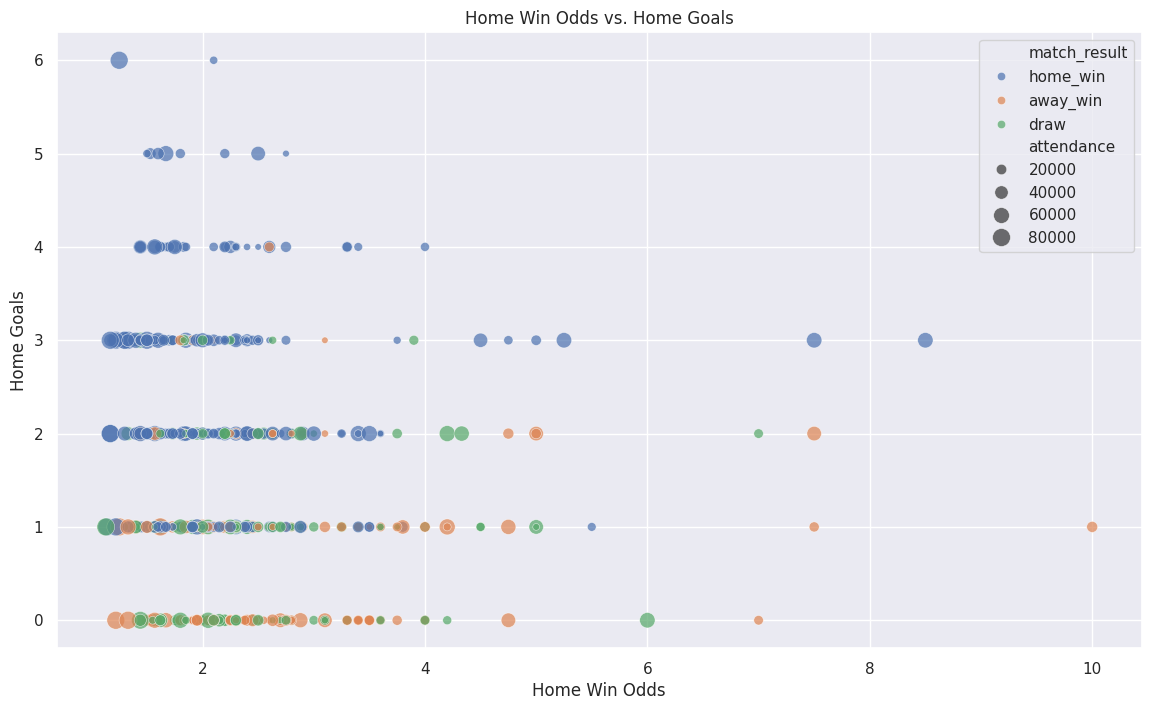

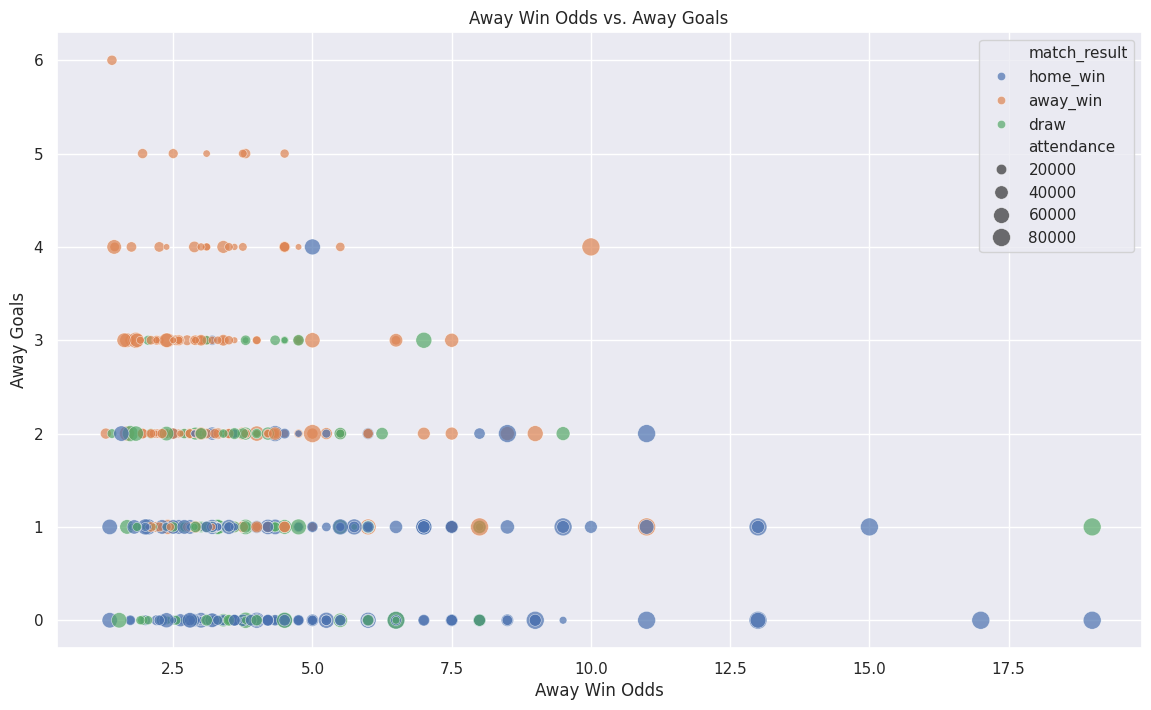

In [97]:
# Convert the date column to datetime.
merged_df['date'] = pd.to_datetime(merged_df['date']).
# Distribution of betting odds (KDE plots).
plt.figure(figsize=(14, 8))
for column in ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA']:
    sns.kdeplot(data=merged_df[column], label=column)
plt.title('Kernel Density Estimate of Betting Odds')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.show()
# Correlation matrix (heatmap with more variables).
plt.figure(figsize=(14, 10))
corr = merged_df[['B365H', 'B365D', 'B365A', 'home_club_goals', 'away_club_goals', 'attendance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
# Trend of odds over time (Facet Grid by competition).
g = sns.FacetGrid(merged_df, col='league_name', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'date', 'B365H', label='B365 Home Win Odds')
g.map(sns.lineplot, 'date', 'B365D', label='B365 Draw Odds')
g.map(sns.lineplot, 'date', 'B365A', label='B365 Away Win Odds')
g.add_legend()
g.set_axis_labels('Date', 'Odds')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trend of Betting Odds Over Time by Competition')
plt.show()
# Comparison of betting providers for home win odds (Violin Plot).
plt.figure(figsize=(14, 8))
sns.violinplot(data=merged_df[['B365H', 'BWH', 'IWH']])
plt.title('Comparison of Home Win Odds by Different Providers')
plt.show()

# Add a column to indicate the match result.
def match_result(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return 'home_win'
    elif row['home_club_goals'] < row['away_club_goals']:
        return 'away_win'
    else:
        return 'draw'

merged_df['match_result'] = merged_df.apply(match_result, axis=1)
# Boxplot to show the distribution of odds by match result (Violin Plot).
plt.figure(figsize=(14, 8))
sns.violinplot(data=merged_df, x='match_result', y='B365H')
plt.title('Home Win Odds (B365) by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Home Win Odds')
plt.show()
plt.figure(figsize=(14, 8))
sns.violinplot(data=merged_df, x='match_result', y='B365D')
plt.title('Draw Odds (B365) by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Draw Odds')
plt.show()
plt.figure(figsize=(14, 8))
sns.violinplot(data=merged_df, x='match_result', y='B365A')
plt.title('Away Win Odds (B365) by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Away Win Odds')
plt.show()
# Scatter plot to show the relationship between odds and goals (enhanced).
plt.figure(figsize=(14, 8))
sns.scatterplot(data=merged_df, x='B365H', y='home_club_goals', hue='match_result', size='attendance', sizes=(20, 200), alpha=0.7)
plt.title('Home Win Odds vs. Home Goals')
plt.xlabel('Home Win Odds')
plt.ylabel('Home Goals')
plt.legend()
plt.show()
plt.figure(figsize=(14, 8))
sns.scatterplot(data=merged_df, x='B365A', y='away_club_goals', hue='match_result', size='attendance', sizes=(20, 200), alpha=0.7)
plt.title('Away Win Odds vs. Away Goals')
plt.xlabel('Away Win Odds')
plt.ylabel('Away Goals')
plt.legend()
plt.show()